## 1. Setup & Load Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Setup plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Load processed Parquet files
data_dir = Path('../data/processed')

print("Loading data...")
hourly = pd.read_parquet(data_dir / 'hourly' / 'all_locations_hourly.parquet')
daily = pd.read_parquet(data_dir / 'daily' / 'all_locations_daily.parquet')

print(f"✅ Hourly data loaded: {len(hourly):,} records")
print(f"✅ Daily data loaded: {len(daily):,} records")

Loading data...
✅ Hourly data loaded: 263,160 records
✅ Daily data loaded: 10,965 records


## 2. Data Overview

In [3]:
# Hourly data structure
print("HOURLY DATA STRUCTURE\n")
print(f"Rows: {hourly.shape[0]:,}")
print(f"Columns: {hourly.shape[1]}")
print(f"\nDate range: {hourly['date'].min()} to {hourly['date'].max()}")
print(f"\nLocations: {hourly['location_code'].nunique()}")
print(f"Locations: {sorted(hourly['location_name'].unique())}")
print(f"\nColumns ({len(hourly.columns)}):")
print(hourly.columns.tolist())

HOURLY DATA STRUCTURE

Rows: 263,160
Columns: 33

Date range: 2019-12-31 22:00:00+00:00 to 2021-12-31 21:00:00+00:00

Locations: 15
Locations: ['Bloemfontein', 'Cape Town', 'Durban', 'East London', 'Franschhoek', 'Hermanus', 'Johannesburg', 'Knysna', 'Nelspruit (Mbombela)', 'Paarl', 'Pietermaritzburg', 'Polokwane', 'Port Elizabeth (Gqeberha)', 'Pretoria', 'Stellenbosch']

Columns (33):
['date', 'location_code', 'location_name', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 'snowfall', 'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_gusts_10m', 'wind_direction_100m', 'wind_direction_10m', 'wind_speed_100m', 'wind_speed_10m', 'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm', 'so

In [8]:
# Daily data structure
print("DAILY DATA STRUCTURE\n")
print(f"Rows: {daily.shape[0]:,}")
print(f"Columns: {daily.shape[1]}")
print(f"\nDate range: {daily['date'].min()} to {daily['date'].max()}")
print(f"\nLocations: {daily['location_code'].nunique()}")
print(f"\nColumns ({len(daily.columns)}):")
print(daily.columns.tolist())



DAILY DATA STRUCTURE

Rows: 10,965
Columns: 57

Date range: 2019-12-31 22:00:00+00:00 to 2021-12-30 22:00:00+00:00

Locations: 15

Columns (57):
['date', 'location_code', 'location_name', 'weather_code', 'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'sunshine_duration', 'daylight_duration', 'sunset', 'sunrise', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours', 'et0_fao_evapotranspiration', 'shortwave_radiation_sum', 'wind_direction_10m_dominant', 'wind_gusts_10m_max', 'wind_speed_10m_max', 'cloud_cover_mean', 'cloud_cover_max', 'cloud_cover_min', 'dew_point_2m_mean', 'dew_point_2m_max', 'dew_point_2m_min', 'pressure_msl_min', 'pressure_msl_max', 'pressure_msl_mean', 'snowfall_water_equivalent_sum', 'relative_humidity_2m_min', 'relative_humidity_2m_max', 'et0_fao_evapotranspiration_sum', 'relative_humidity_2m_mean', 'surface_pressure_mean', 'surface_pressure_ma

In [9]:
# First few rows of hourly data
hourly.head()

,date,location_code,location_name,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_gusts_10m,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
0,2019-12-31 22:00:00+00:00,bloemfontein,Bloemfontein,21.969,55.550785,12.669,20.371067,0.0,0.0,0.0,0.0,1.0,1011.2,862.79550,40.0,0.0,40.0,0.0,0.087096,1.173292,33.839996,3.772209,7.431319,32.831135,16.700275,22.469000,24.219000,22.269001,20.219000,0.244,0.232,0.177,0.157
1,2019-12-31 22:00:00+00:00,cape_town,Cape Town,18.427,71.484300,13.177,15.369822,0.0,0.0,0.0,0.0,0.0,1014.3,1012.28200,0.0,0.0,0.0,0.0,0.078052,0.604859,52.920000,159.227660,160.395830,44.663220,27.897097,21.227001,24.577002,21.877000,19.777000,0.051,0.052,0.091,0.145
2,2019-12-31 22:00:00+00:00,durban,Durban,20.438,80.852905,17.038,21.770285,0.0,0.0,0.0,0.0,1.0,1016.7,1013.74744,31.0,24.0,27.0,0.0,0.008836,0.460036,14.759999,235.922760,264.805660,14.777550,7.952660,22.188000,24.938000,24.038000,21.987999,0.147,0.133,0.154,0.126
3,2019-12-31 22:00:00+00:00,east_london,East London,19.902,73.392260,15.002,19.679829,0.0,0.0,0.0,0.0,0.0,1016.6,1011.51920,9.0,8.0,2.0,0.0,0.036829,0.618568,25.199999,38.659830,33.690100,23.051247,12.979984,20.902000,22.852000,21.602000,19.752000,0.096,0.134,0.117,0.042
4,2019-12-31 22:00:00+00:00,franschhoek,Franschhoek,16.601,74.262460,12.001,14.592730,0.0,0.0,0.0,0.0,0.0,1014.7,981.04504,0.0,0.0,0.0,0.0,0.042420,0.486616,61.199997,116.016730,116.053440,33.649890,18.032370,21.151000,23.901000,20.201000,18.251000,0.188,0.213,0.196,0.348


In [10]:
# First few rows of daily data
daily.head()

,date,location_code,location_name,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,sunset,sunrise,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,et0_fao_evapotranspiration,shortwave_radiation_sum,wind_direction_10m_dominant,wind_gusts_10m_max,wind_speed_10m_max,cloud_cover_mean,cloud_cover_max,cloud_cover_min,dew_point_2m_mean,dew_point_2m_max,dew_point_2m_min,pressure_msl_min,pressure_msl_max,pressure_msl_mean,snowfall_water_equivalent_sum,relative_humidity_2m_min,relative_humidity_2m_max,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean,surface_pressure_mean,surface_pressure_max,surface_pressure_min,winddirection_10m_dominant,wind_gusts_10m_mean,wind_speed_10m_mean,wind_gusts_10m_min,wind_speed_10m_min,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min,vapour_pressure_deficit_max,soil_moisture_0_to_100cm_mean,soil_moisture_0_to_7cm_mean,soil_moisture_28_to_100cm_mean,soil_moisture_7_to_28cm_mean,soil_temperature_0_to_100cm_mean,soil_temperature_0_to_7cm_mean,soil_temperature_28_to_100cm_mean,soil_temperature_7_to_28cm_mean
0,2019-12-31 22:00:00+00:00,bloemfontein,Bloemfontein,1.0,25.016916,31.819,18.019001,24.078827,31.705246,17.826836,46725.457,50289.270,1577899055,1577848766,0.0,0.0,0.0,0.0,7.779589,30.81,341.543520,45.000000,22.461807,8.041667,40.0,0.0,12.258584,16.869001,6.019000,1006.3,1014.1,1010.71265,0.0,21.677520,88.94883,7.779589,50.235897,863.72650,866.16640,862.11566,341.543520,33.105000,15.867417,23.759998,8.699793,17.331568,19.974945,15.726658,3.671774,0.192648,0.229792,0.177875,0.230917,22.884771,25.346083,22.294000,24.089834
1,2019-12-31 22:00:00+00:00,cape_town,Cape Town,0.0,21.097834,26.427,16.927000,19.105175,26.266890,15.144316,48486.457,51715.960,1577901606,1577849891,0.0,0.0,0.0,0.0,6.486071,32.96,165.195530,67.679990,37.894165,0.083333,1.0,0.0,14.968667,16.627000,13.177000,1012.1,1014.3,1013.08325,0.0,51.350600,86.51658,6.486071,69.329216,1011.08594,1012.28200,1010.11110,165.195530,53.474995,28.802786,36.000000,20.545246,17.073410,19.543360,14.912857,1.654679,0.080947,0.042500,0.091500,0.057583,22.685608,26.143667,21.904085,24.212418
2,2019-12-31 22:00:00+00:00,durban,Durban,51.0,23.342169,26.838,19.438000,25.945421,29.393375,20.495188,36555.020,50488.720,1577898001,1577847512,0.3,0.3,0.0,3.0,3.976006,20.17,169.154250,33.839996,16.263872,79.041664,100.0,23.0,19.198418,22.588000,15.938001,1011.7,1016.7,1014.28320,0.0,66.132030,94.13106,3.976006,77.965750,1011.36640,1013.74744,1008.81450,169.154250,17.535002,7.548140,4.320000,1.800000,20.439493,22.849794,17.064041,1.123794,0.146303,0.131458,0.152417,0.130292,24.227333,25.233835,23.996336,24.683836
3,2019-12-31 22:00:00+00:00,east_london,East London,51.0,21.395752,23.002,18.652000,20.926043,21.970680,18.588522,23101.148,51429.516,1577899201,1577847771,0.6,0.6,0.0,4.0,3.631637,15.52,59.718273,55.440000,25.233406,66.916664,100.0,7.0,16.206167,17.752000,14.502000,1013.6,1016.6,1015.14996,0.0,64.103160,79.95959,3.631637,72.449480,1010.10210,1011.51920,1008.58200,59.718273,39.135000,18.009800,21.240000,10.028439,17.883190,18.967064,15.971016,1.008609,0.117912,0.093708,0.116083,0.132250,21.816810,22.364502,21.601997,22.370750
4,2019-12-31 22:00:00+00:00,franschhoek,Franschhoek,0.0,22.276001,30.851,15.101001,22.357750,34.334667,14.039898,48486.457,51715.960,1577901498,1577849783,0.0,0.0,0.0,0.0,7.139920,33.33,125.389694,61.199997,18.032370,0.416667,2.0,0.0,13.430167,16.001000,11.751000,1010.7,1014.7,1012.83740,0.0,31.166971,85.86002,7.139920,60.352580,979.86570,981.04504,978.48016,125.389694,44.160000,12.376876,18.359999,2.968636,16.664557,20.230051,13.343870,3.065780,0.196201,0.177208,0.194667,0.207792,21.345627,25.282250,20.309332,23.586416


In [11]:
# Data info
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263160 entries, 0 to 263159
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   date                           263160 non-null  datetime64[ns, UTC]
 1   location_code                  263160 non-null  object             
 2   location_name                  263160 non-null  object             
 3   temperature_2m                 263160 non-null  float64            
 4   relative_humidity_2m           263160 non-null  float64            
 5   dew_point_2m                   263160 non-null  float64            
 6   apparent_temperature           263160 non-null  float64            
 7   precipitation                  263160 non-null  float64            
 8   rain                           263160 non-null  float64            
 9   snowfall                       263160 non-null  float64            
 10  snow_dep

In [31]:
# Data info
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10965 entries, 0 to 10964
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   date                               10965 non-null  datetime64[ns, UTC]
 1   location_code                      10965 non-null  object             
 2   location_name                      10965 non-null  object             
 3   weather_code                       10965 non-null  float64            
 4   temperature_2m_mean                10965 non-null  float64            
 5   temperature_2m_max                 10965 non-null  float64            
 6   temperature_2m_min                 10965 non-null  float64            
 7   apparent_temperature_mean          10965 non-null  float64            
 8   apparent_temperature_max           10965 non-null  float64            
 9   apparent_temperature_min           10965 non-null 

## 3. Data Quality Check

In [4]:
# Check for missing values in hourly data
print("Missing Values in Hourly Data:")
missing_hourly = hourly.isnull().sum()
missing_hourly = missing_hourly[missing_hourly > 0]

if len(missing_hourly) > 0:
    print(missing_hourly)
else:
    print("\nNo missing values!")

Missing Values in Hourly Data:

No missing values!


In [38]:
# Check for missing values in daily data
print("Missing Values in Daily Data:")
missing_daily = daily.isnull().sum()
missing_daily = missing_daily[missing_daily > 0]

if len(missing_daily) > 0:
    print(missing_daily)
else:
    print("\nNo missing values!")

Missing Values in Daily Data:

No missing values!


## 4. Basic Statistics

In [5]:
# Summary statistics for key weather variables
key_vars = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'wind_speed_10m']
hourly[key_vars].describe()

,temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m
count,263160.000000,263160.000000,263160.000000,263160.000000
mean,17.683614,67.925687,0.086529,12.325908
std,5.676702,21.498506,0.439549,7.377096
min,-4.018000,4.091573,0.000000,0.000000
25%,13.952000,53.455986,0.000000,6.952755
50%,17.652000,71.745655,0.000000,10.630672
75%,21.310501,85.754837,0.000000,16.179987
max,41.060500,100.000000,20.800000,61.921043


In [6]:
# Average temperature by location
avg_temp = hourly.groupby('location_name')['temperature_2m'].mean().sort_values(ascending=False)
print("\nAverage Temperature by Location (°C):")
print(avg_temp.round(2))


Average Temperature by Location (°C):
location_name
Durban                       20.83
Nelspruit (Mbombela)         19.60
East London                  19.14
Pietermaritzburg             18.31
Polokwane                    17.99
Port Elizabeth (Gqeberha)    17.81
Pretoria                     17.76
Paarl                        17.68
Knysna                       17.45
Cape Town                    17.04
Hermanus                     16.85
Stellenbosch                 16.83
Franschhoek                  16.53
Bloemfontein                 16.27
Johannesburg                 15.15
Name: temperature_2m, dtype: float64


In [41]:
# Average temperature by location
avg_temp = daily.groupby('location_name')['temperature_2m_mean'].mean().sort_values(ascending=False)
print("\nAverage Temperature by Location (°C):")
print(avg_temp.round(2))


Average Temperature by Location (°C):
location_name
Durban                       20.83
Nelspruit (Mbombela)         19.60
East London                  19.14
Pietermaritzburg             18.31
Polokwane                    17.99
Port Elizabeth (Gqeberha)    17.81
Pretoria                     17.76
Paarl                        17.68
Knysna                       17.45
Cape Town                    17.04
Hermanus                     16.85
Stellenbosch                 16.83
Franschhoek                  16.53
Bloemfontein                 16.27
Johannesburg                 15.15
Name: temperature_2m_mean, dtype: float64


## 5. Visualizations

<Figure size 1400x600 with 0 Axes>

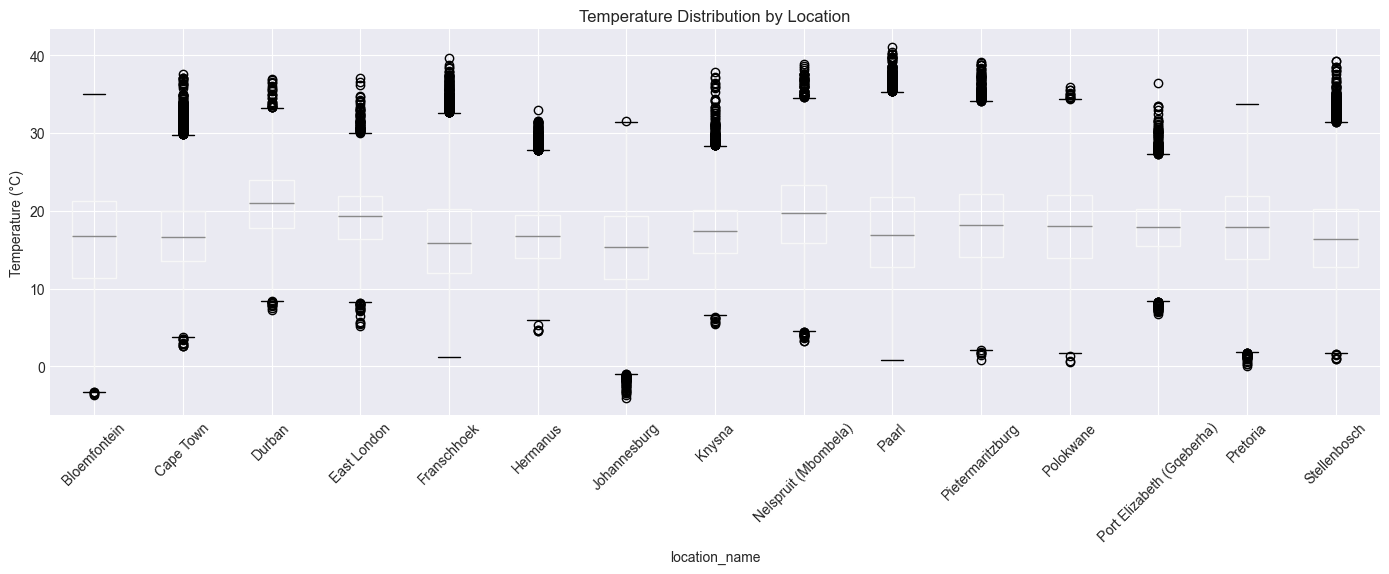

In [19]:
# Temperature distribution by location
plt.figure(figsize=(14, 6))
hourly.boxplot(column='temperature_2m', by='location_name', rot=45, figsize=(14, 6))
plt.title('Temperature Distribution by Location')
plt.suptitle('')  # Remove default title
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

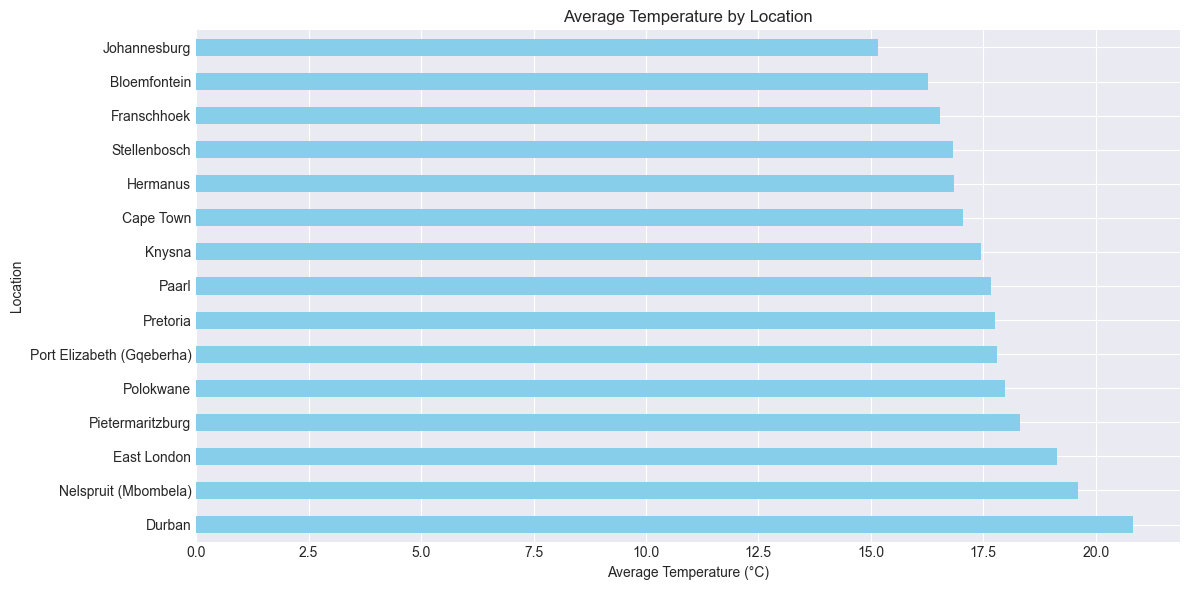

In [7]:
# Average temperature by location (bar chart)
plt.figure(figsize=(12, 6))
avg_temp.plot(kind='barh', color='skyblue')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Location')
plt.title('Average Temperature by Location')
plt.tight_layout()
plt.show()

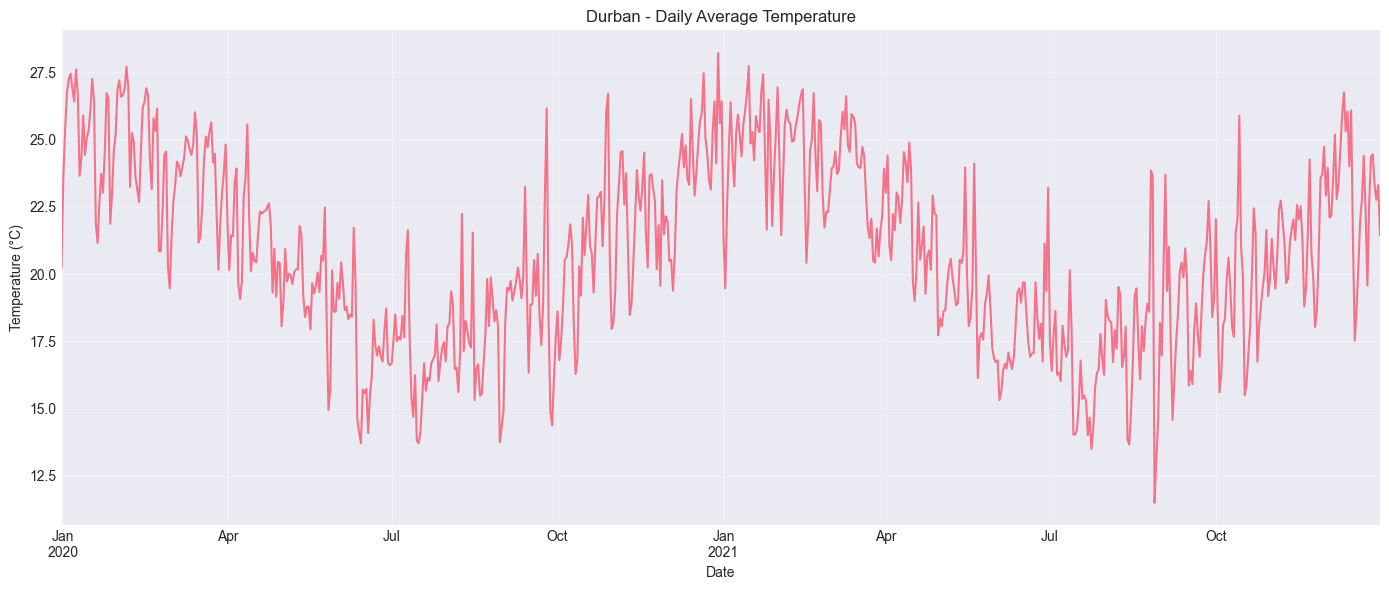

In [29]:
# Temperature over time for Cape Town (example)
durban = hourly[hourly['location_code'] == 'durban'].copy()
durban = durban.set_index('date')

plt.figure(figsize=(14, 6))
durban['temperature_2m'].resample('D').mean().plot()
plt.title('Durban - Daily Average Temperature')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

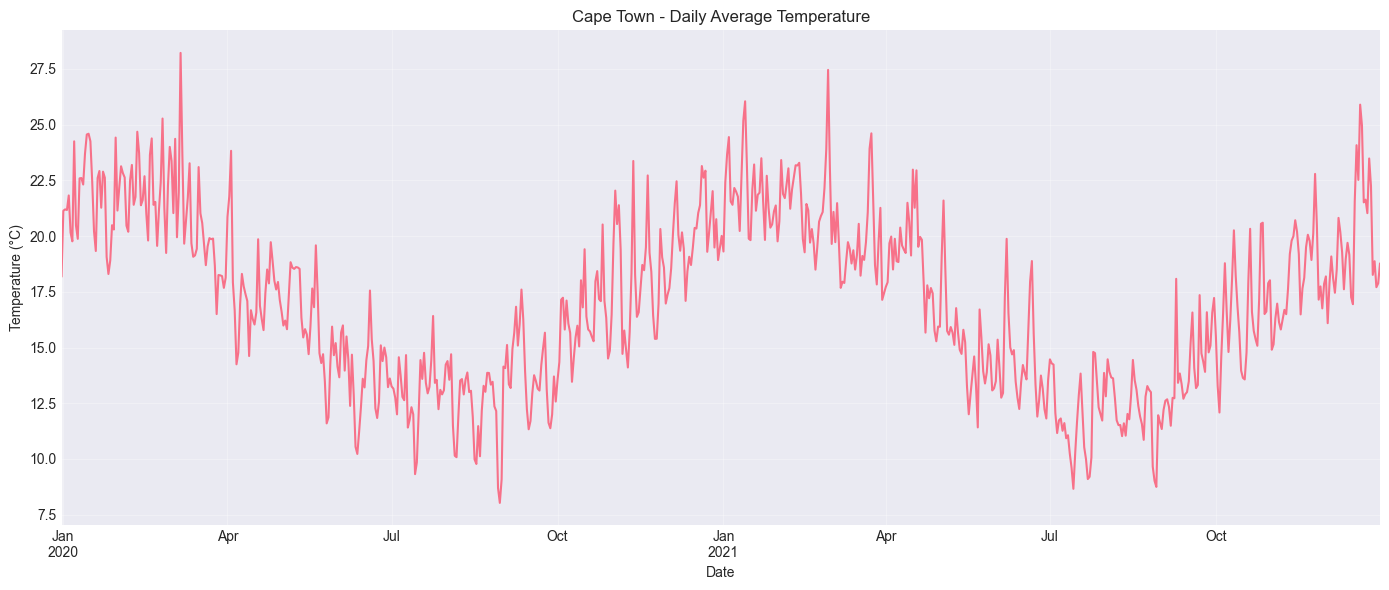

In [9]:
# Temperature over time for Cape Town (example)
cape_town = hourly[hourly['location_code'] == 'cape_town'].copy()
cape_town = cape_town.set_index('date')

plt.figure(figsize=(14, 6))
cape_town['temperature_2m'].resample('D').mean().plot()
plt.title('Cape Town - Daily Average Temperature')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

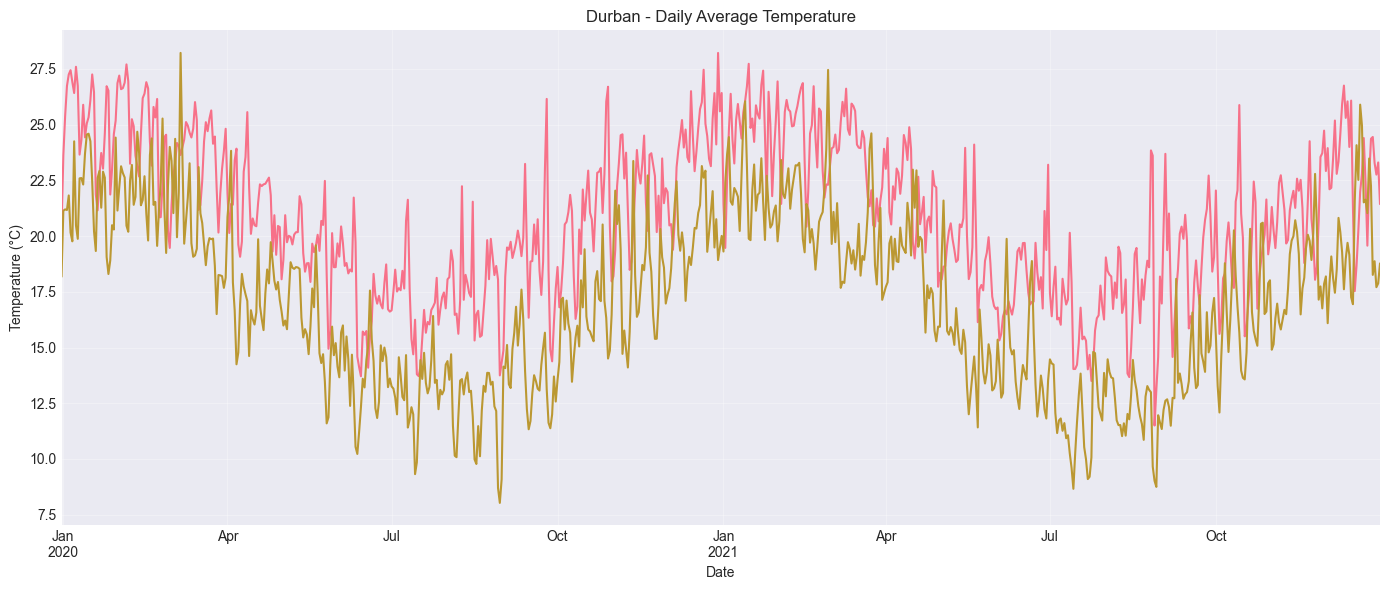

In [30]:
# Temperature over time for Cape Town (example)
durban = hourly[hourly['location_code'] == 'durban'].copy()
durban = durban.set_index('date')
cape_town = hourly[hourly['location_code'] == 'cape_town'].copy()
cape_town = cape_town.set_index('date')

plt.figure(figsize=(14, 6))
durban['temperature_2m'].resample('D').mean().plot()
cape_town['temperature_2m'].resample('D').mean().plot()
plt.title('Durban - Daily Average Temperature')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


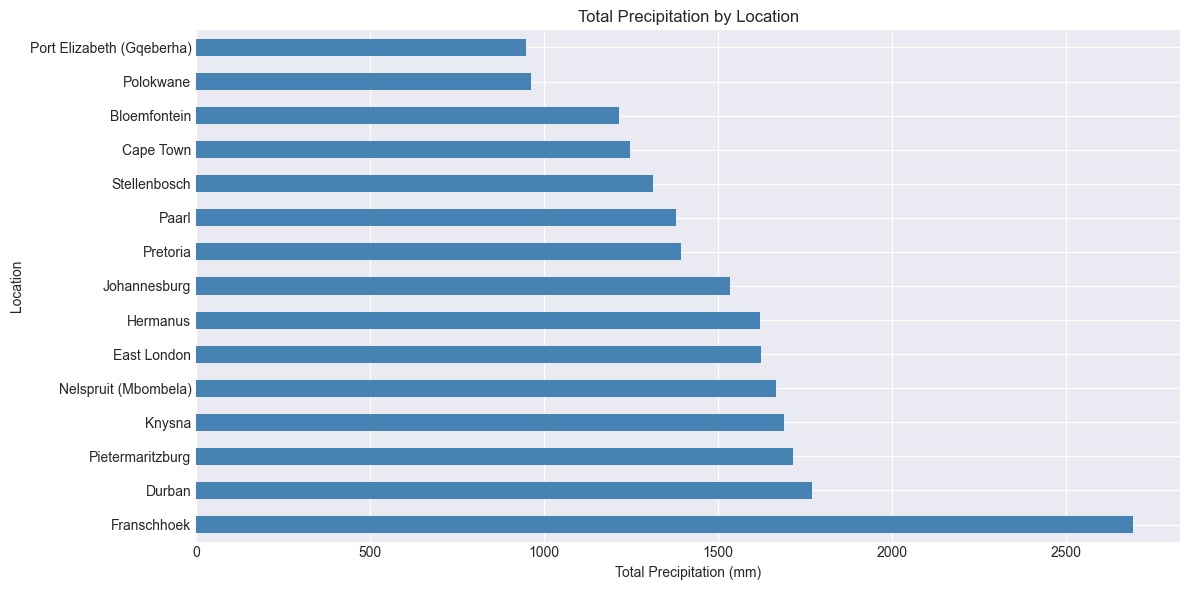

In [8]:
# Precipitation by location (total)
total_precip = hourly.groupby('location_name')['precipitation'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
total_precip.plot(kind='barh', color='steelblue')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Location')
plt.title('Total Precipitation by Location')
plt.tight_layout()
plt.show()

## 6. Correlation Analysis

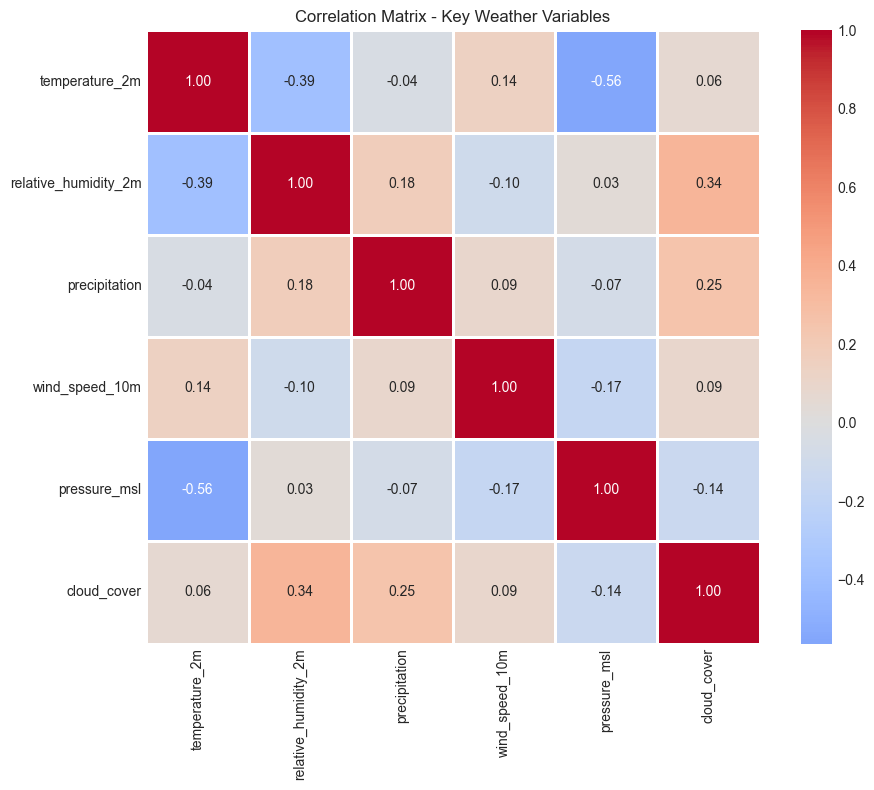

In [10]:
# Correlation matrix for key variables
key_vars = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 
            'wind_speed_10m', 'pressure_msl', 'cloud_cover']

corr_matrix = hourly[key_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix - Key Weather Variables')
plt.tight_layout()
plt.show()

## 7. Next Steps

Now that we've explored the data, here are some next steps:

1. **Feature Engineering:** Create new features like season, day_of_week, is_weekend
2. **Tourism Analysis:** Correlate weather patterns with tourism seasons
3. **Anomaly Detection:** Identify unusual weather events
4. **Forecasting:** Build predictive models for weather patterns
5. **Regional Clustering:** Group locations by similar weather patterns

In [11]:
# Save summary statistics
summary = hourly.groupby('location_name').agg({
    'temperature_2m': ['mean', 'min', 'max', 'std'],
    'precipitation': ['sum', 'mean'],
    'relative_humidity_2m': 'mean',
    'wind_speed_10m': 'mean'
}).round(2)

print("\nSummary Statistics by Location:")
summary


Summary Statistics by Location:


temperature_2m                    precipitation  \
                                    mean   min    max   std           sum   
location_name                                                               
Bloemfontein                       16.27 -3.63  34.97  7.24        1215.5   
Cape Town                          17.04  2.63  37.53  5.10        1245.6   
Durban                             20.83  7.29  36.89  4.49        1770.8   
East London                        19.14  5.25  37.10  3.98        1623.4   
Franschhoek                        16.53  1.25  39.60  6.18        2693.3   
Hermanus                           16.85  4.52  32.97  4.19        1621.2   
Johannesburg                       15.15 -4.02  31.53  6.02        1535.4   
Knysna                             17.45  5.46  37.81  4.10        1690.0   
Nelspruit (Mbombela)               19.60  3.22  38.92  5.71        1665.3   
Paarl                              17.68  0.81  41.06  6.75        1379.7   
Pietermaritzburg                   18.31  0.76  39.11  6.09        1716.5   
Polokwane                          17.99  0.53  35.93  5.90         961.5   
Port Elizabeth (Gqeberha)          17.81  6.76  36.41  3.55         947.6   
Pretoria                           17.76  0.03  33.73  5.98        1392.2   
Stellenbosch                       16.83  0.93  39.28  5.82        1312.9   

                                relative_humidity_2m wind_speed_10m  
                           mean                 mean           mean  
location_name                                                        
Bloemfontein               0.07                51.80          12.02  
Cape Town                  0.07                74.21          15.52  
Durban                     0.10                73.46          13.41  
East London                0.09                71.75          16.20  
Franschhoek                0.15                70.21           9.76  
Hermanus                   0.09                76.46          13.96  
Johannesburg               0.09                57.44          12.20  
Knysna                     0.10                76.38          12.95  
Nelspruit (Mbombela)       0.09                70.00           7.05  
Paarl                      0.08                65.29           8.85  
Pietermaritzburg           0.10                70.17           8.79  
Polokwane                  0.05                61.17          10.82  
Port Elizabeth (Gqeberha)  0.05                74.04          19.23  
Pretoria                   0.08                55.40          10.81  
Stellenbosch               0.07                71.11          13.30